In [1]:
print("Bissmillahirrahmanirrahim top 50 product capstone")


Bissmillahirrahmanirrahim top 50 product capstone


In [2]:
!sudo apt-get update
!sudo apt-get install -y gnupg2 curl
!sudo curl -O https://developer.download.nvidia.com/compute/cuda/repos/debian10/x86_64/cuda-ubuntu2004.pin
!sudo mv cuda-ubuntu2004.pin /etc/apt/preferences.d/cuda-repository-pin-600
!sudo curl -LO https://developer.download.nvidia.com/compute/cuda/11.4.2/local_installers/cuda-repo-debian10-11-4-local_11.4.2-470.57.02-1_amd64.deb
!sudo dpkg -i cuda-repo-debian10-11-4-local_11.4.2-470.57.02-1_amd64.deb
!sudo apt-get update
!sudo apt-get -y install cuda

Get:1 file:/var/cuda-repo-debian10-11-4-local  InRelease
Ign:1 file:/var/cuda-repo-debian10-11-4-local  InRelease
Get:2 file:/var/cuda-repo-debian10-11-4-local  Release [564 B]
Get:2 file:/var/cuda-repo-debian10-11-4-local  Release [564 B]                 
Get:3 file:/var/cuda-repo-debian10-11-4-local  Release.gpg [836 B]             
Get:3 file:/var/cuda-repo-debian10-11-4-local  Release.gpg [836 B]             
Hit:4 http://deb.debian.org/debian bullseye InRelease                          
Hit:5 http://packages.cloud.google.com/apt gcsfuse-bullseye InRelease          
Hit:6 http://security.debian.org/debian-security bullseye-security InRelease   
Hit:7 http://deb.debian.org/debian bullseye-updates InRelease                  
Hit:8 https://packages.cloud.google.com/apt google-fast-socket InRelease       
Hit:9 http://packages.cloud.google.com/apt google-compute-engine-bullseye-stable InRelease
Hit:10 http://deb.debian.org/debian bullseye-backports InRelease               
Hit:11 https

In [3]:
!nvidia-smi

Tue Jun 13 06:27:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    26W /  70W |      0MiB / 15360MiB |     11%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install --user tensorflow==2.11.1

In [24]:
import tensorflow as tf

In [25]:
print(tf.__version__)

2.11.1


In [26]:


from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [27]:
import os
import zipfile


 define the directories containing your images

In [28]:
# variabel directory for training pict for each category
train_oily_dir = os.path.join("/home/jupyter/content/faceSkin_tipe_train/oily")
train_normal_dir = os.path.join("/home/jupyter/content/faceSkin_tipe_train/normal")
train_combination_dir =os.path.join("/home/jupyter/content/faceSkin_tipe_train/combination")
train_sensitive_dir = os.path.join("/home/jupyter/content/faceSkin_tipe_train/sensitive")
train_dry_dir = os.path.join("/home/jupyter/content/faceSkin_tipe_train/dry")
train_nonface_dir = os.path.join("/home/jupyter/content/faceSkin_tipe_train/nonface/")

# variabel directory for validation pict for each category
validation_oily_dir =os.path.join("/home/jupyter/content/faceSkin_tipe_validation/oily")
validation_normal_dir =os.path.join("/home/jupyter/content/faceSkin_tipe_validation/normal")
validation_combination_dir =os.path.join("/home/jupyter/content/faceSkin_tipe_validation/combination")
validation_sensitive_dir =os.path.join("/home/jupyter/content/faceSkin_tipe_validation/sensitive")
validation_dry_dir =os.path.join("/home/jupyter/content/faceSkin_tipe_validation/dry")
validation_nonface_dir =os.path.join("/home/jupyter/content/faceSkin_tipe_validation/nonface")

filenames check in directory

In [29]:
train_dry_names = os.listdir(train_dry_dir)
train_oily_names = os.listdir(train_oily_dir)
train_normal_names =  os.listdir(train_normal_dir)
train_combination_names =  os.listdir(train_combination_dir)
train_sensitive_names =  os.listdir(train_sensitive_dir)
train_nonface_names =  os.listdir(train_nonface_dir)

validation_dry_names = os.listdir(validation_dry_dir)
validation_oily_names = os.listdir(validation_oily_dir)
validation_normal_names =  os.listdir(validation_normal_dir)
validation_combination_names =  os.listdir(validation_combination_dir)
validation_sensitive_names =  os.listdir(validation_sensitive_dir)
validation_nonface_names =  os.listdir(validation_nonface_dir)

print(f'TRAIN SET DRY: {train_dry_names[:5]}')
print(f'TRAIN SET OILY: {train_dry_names[:5]}')
print(f'TRAIN SET SENSITIVE: {train_dry_names[:5]}')
print(f'TRAIN SET COMBINATION: {train_dry_names[:5]}')
print(f'TRAIN SET NORMAL: {train_dry_names[:5]}')
print(f'TRAIN SET NONFACE: {train_nonface_names[:5]} \n')

print(f'VALIDATION SET DRY: {validation_dry_names[:5]}')
print(f'VALIDATION SET OILY: {validation_dry_names[:5]}')
print(f'VALIDATION SET SENSITIVE: {validation_dry_names[:5]}')
print(f'VALIDATION SET COMBINATION: {validation_dry_names[:5]}')
print(f'VALIDATION SET NORMAL: {validation_dry_names[:5]}')
print(f'VALIDATION SET NONFACE: {validation_nonface_names[:5]}')

TRAIN SET DRY: ['f1-006-01.jpg', 'folder(185)3.jpg', 'folder(95)2.jpg', 'folder(224)2.jpg', 'folder(219)2.jpg']
TRAIN SET OILY: ['f1-006-01.jpg', 'folder(185)3.jpg', 'folder(95)2.jpg', 'folder(224)2.jpg', 'folder(219)2.jpg']
TRAIN SET SENSITIVE: ['f1-006-01.jpg', 'folder(185)3.jpg', 'folder(95)2.jpg', 'folder(224)2.jpg', 'folder(219)2.jpg']
TRAIN SET COMBINATION: ['f1-006-01.jpg', 'folder(185)3.jpg', 'folder(95)2.jpg', 'folder(224)2.jpg', 'folder(219)2.jpg']
TRAIN SET NORMAL: ['f1-006-01.jpg', 'folder(185)3.jpg', 'folder(95)2.jpg', 'folder(224)2.jpg', 'folder(219)2.jpg']
TRAIN SET NONFACE: ['000000013201.jpg', '000000017115.jpg', '000000002473.jpg', '000000024021.jpg', '000000015335.jpg'] 

VALIDATION SET DRY: ['folder(7)2.jpg', 'dd.jpg', 'folder(72)3.jpg', 'folder(77)3.jpg', '1 (72).jpg']
VALIDATION SET OILY: ['folder(7)2.jpg', 'dd.jpg', 'folder(72)3.jpg', 'folder(77)3.jpg', '1 (72).jpg']
VALIDATION SET SENSITIVE: ['folder(7)2.jpg', 'dd.jpg', 'folder(72)3.jpg', 'folder(77)3.jpg', '1 (

chacking total number of images for each categories in training and validation directories 

In [30]:
print(f'total training oily images: {len(os.listdir(train_oily_dir))}')
print(f'total training dry images: {len(os.listdir(train_dry_dir))}')
print(f'total training normal images: {len(os.listdir(train_normal_dir))}')
print(f'total training combination images: {len(os.listdir(train_combination_dir))}')
print(f'total training sensitive images: {len(os.listdir(train_sensitive_dir))}')
print(f'total training nonface images: {len(os.listdir(train_nonface_dir))}\n')


print(f'total validation oily images: {len(os.listdir(validation_oily_dir))}')
print(f'total validation dry images: {len(os.listdir(validation_dry_dir))}')
print(f'total validation normal images: {len(os.listdir(validation_normal_dir))}')
print(f'total validation combination images: {len(os.listdir(validation_combination_dir))}')
print(f'total validation sensitive images: {len(os.listdir(validation_sensitive_dir))}')
print(f'total validation nonface images: {len(os.listdir(validation_nonface_dir))}')





total training oily images: 209
total training dry images: 207
total training normal images: 99
total training combination images: 110
total training sensitive images: 202
total training nonface images: 200

total validation oily images: 53
total validation dry images: 50
total validation normal images: 25
total validation combination images: 36
total validation sensitive images: 49
total validation nonface images: 50


In [31]:
print((os.listdir('/home/jupyter/content/faceSkin_tipe_validation/')))

['oily', 'normal', '.ipynb_checkpoints', 'sensitive', 'dry', 'nonface', 'combination']


# Data preprocessing


using image data generator

In [44]:
#punya valiant
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Set the base directory where your data is located
base_directory = '/home/jupyter/content/'

# Get the list of subdirectories (classes) in the training directory
train_classes = [subdir for subdir in os.listdir(os.path.join(base_directory, 'faceSkin_tipe_train')) if os.path.isdir(os.path.join(base_directory, 'faceSkin_tipe_train', subdir))]

# Remove the ".ipynb_checkpoints" class from the list if it exists
if '.ipynb_checkpoints' in train_classes:
    train_classes.remove('.ipynb_checkpoints')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        os.path.join(base_directory, 'faceSkin_tipe_train'),  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        class_mode='categorical',
        classes=train_classes)

# Get the list of subdirectories (classes) in the validation directory
validation_classes = [subdir for subdir in os.listdir(os.path.join(base_directory, 'faceSkin_tipe_validation')) if os.path.isdir(os.path.join(base_directory, 'faceSkin_tipe_validation', subdir))]

# Remove the ".ipynb_checkpoints" class from the list if it exists
if '.ipynb_checkpoints' in validation_classes:
    validation_classes.remove('.ipynb_checkpoints')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        os.path.join(base_directory, 'faceSkin_tipe_validation'),  # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=8,
        class_mode='categorical',
        classes=validation_classes)


# Get the class names from the generator's class_indices dictionary
class_names = list(train_generator.class_indices.keys())

# Print the class names
print("Class Names:", class_names)


Found 1027 images belonging to 6 classes.
Found 263 images belonging to 6 classes.
Class Names: ['oily', 'normal', 'sensitive', 'dry', 'nonface', 'combination']


In [45]:

# Access the class indices
class_indices = train_generator.class_indices

# Print the list of classes
print("List of Classes:")
for class_name, class_index in class_indices.items():
    print(class_name, ":", class_index)

List of Classes:
oily : 0
normal : 1
sensitive : 2
dry : 3
nonface : 4
combination : 5


load pretrained model

In [46]:
!python --version

Python 3.10.10


In [47]:
!pip install keras_vggface

In [48]:
!pip install keras_applications

In [49]:
!pip show keras


Name: keras
Version: 2.11.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /home/jupyter/.local/lib/python3.10/site-packages
Requires: 
Required-by: keras-vggface, tensorflow


In [50]:
import tensorflow.keras as keras

In [51]:
print(tf.__version__)

2.11.1


In [52]:

from keras_vggface.vggface import VGGFace
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/home/jupyter/content/vgg_face_weights.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = VGGFace(input_shape = (224, 224, 3), 
                                include_top = False, 
                                model = 'vgg16')

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file, by_name=True, skip_mismatch=True)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [53]:
pre_trained_model.summary()


Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [54]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('conv5_3')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print('last layer output: ', last_output)

last layer output shape:  (None, 14, 14, 512)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 512), dtype=tf.float32, name=None), name='conv5_3/Relu:0', description="created by layer 'conv5_3'")


# add dense layer depends on the classification (5 category)


In [55]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation="ReLU")(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(6, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

compiling the model

In [56]:

from tensorflow.keras.optimizers import Adam
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

#membuat callback untuk menentukan learning rate terbaik
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10 **(epoch/20))


Training

In [57]:
len(validation_generator)

9

In [58]:
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),  
      epochs=150,
      #callbacks = [lr_scheduler],
      verbose=2,
      validation_data = validation_generator,
      validation_steps=len(validation_generator))

Epoch 1/150
33/33 - 200s - loss: 1.4591 - accuracy: 0.4391 - val_loss: 1.2940 - val_accuracy: 0.4563 - 200s/epoch - 6s/step
Epoch 2/150
33/33 - 67s - loss: 1.1686 - accuracy: 0.5307 - val_loss: 1.1996 - val_accuracy: 0.4943 - 67s/epoch - 2s/step
Epoch 3/150
33/33 - 68s - loss: 1.1396 - accuracy: 0.5453 - val_loss: 1.0980 - val_accuracy: 0.5894 - 68s/epoch - 2s/step
Epoch 4/150
33/33 - 68s - loss: 1.0312 - accuracy: 0.5842 - val_loss: 1.0692 - val_accuracy: 0.5665 - 68s/epoch - 2s/step
Epoch 5/150
33/33 - 66s - loss: 1.0230 - accuracy: 0.5891 - val_loss: 1.0605 - val_accuracy: 0.5551 - 66s/epoch - 2s/step
Epoch 6/150
33/33 - 66s - loss: 0.9765 - accuracy: 0.6193 - val_loss: 1.0774 - val_accuracy: 0.5513 - 66s/epoch - 2s/step
Epoch 7/150
33/33 - 66s - loss: 0.9650 - accuracy: 0.6310 - val_loss: 1.0274 - val_accuracy: 0.5779 - 66s/epoch - 2s/step
Epoch 8/150
33/33 - 66s - loss: 0.9376 - accuracy: 0.6212 - val_loss: 1.0288 - val_accuracy: 0.5817 - 66s/epoch - 2s/step
Epoch 9/150
33/33 - 66

KeyboardInterrupt: 

In [28]:
import pandas as pd

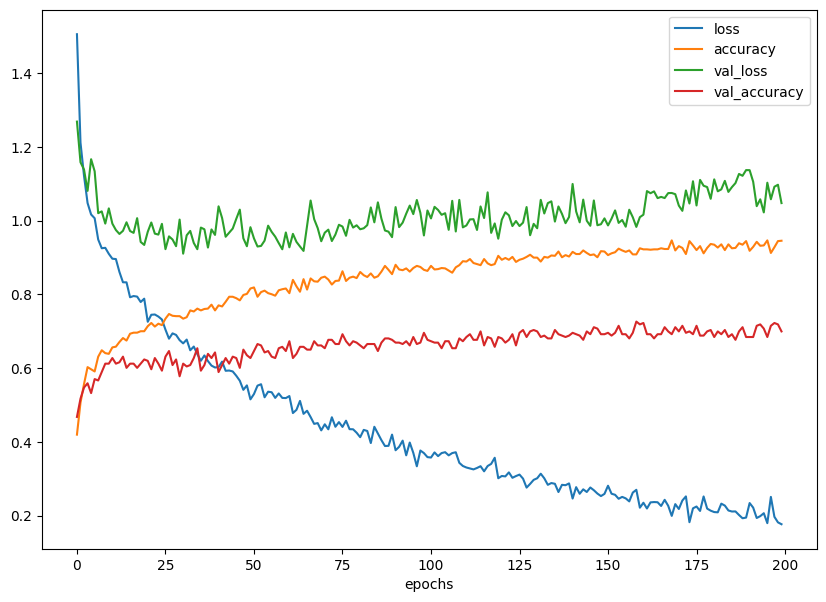

In [29]:
pd.DataFrame(history.history).plot(figsize = (10, 7), xlabel = "epochs");

In [30]:
# #plot the learning rate versus the loss
# lrs = 1e-4 * (10 ** (tf.range(300)/20))
# plt.figure(figsize = (10,7))
# plt.semilogx(lrs, history.history["loss"])
# plt.xlabel("learning rate")
# plt.ylabel("loss")
# plt.title("learning rate vs loss")

In [31]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [32]:
# evaluating accuracy and loss for the model


<Figure size 640x480 with 0 Axes>

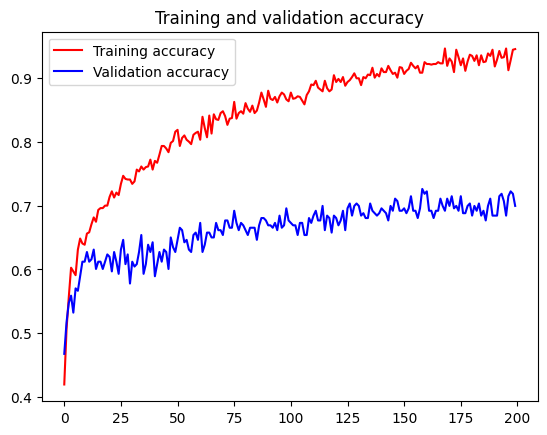

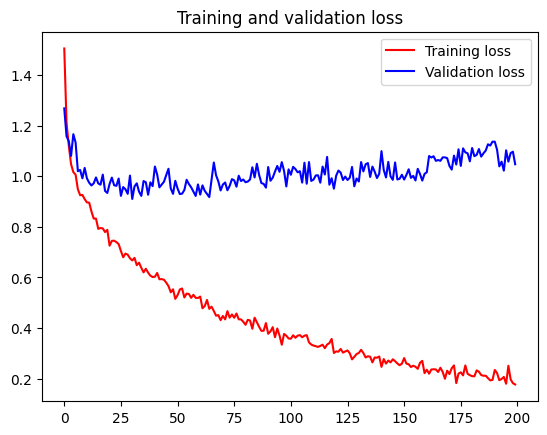

<Figure size 640x480 with 0 Axes>

In [33]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'r', label='Training loss')
plt.plot  ( epochs, val_loss , 'b', label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()


# menyimpan model TAPI BELUM YANG VERSI QUANTIZED 

In [37]:

from keras.models import load_model

model.save('/home/jupyter/content/kerasFormat_model4/model_vggFace_12Juni.h5')

In [35]:

from keras.models import load_model

model.save('/home/jupyter/content/saved Model4')

INFO:tensorflow:Assets written to: /home/jupyter/content/saved Model4/assets


INFO:tensorflow:Assets written to: /home/jupyter/content/saved Model4/assets


# Convert to Tensorflow LITE

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [ ]:
import pathlib

print('\u2022 Using TensorFlow Version:', tf.__version__)

In [ ]:
#!mkdir saved_TFLITE_model

generate SavedModel

In [ ]:
export_dir = "home/jupyter/content/saved_TFLITE_model"
tf.saved_model.save(model, export_dir)

In [ ]:
model = tf.saved_model.load(export_dir)

Convert the SavedModel to JSON

In [ ]:
#!pip install --user tensorflowjs

In [ ]:
# import tensorflowjs
# import json

In [ ]:


# # Load the SavedModel
# model = tf.saved_model.load('home/jupyter/content/saved Model')


In [ ]:
import tensorflow as tf
import json

# Load the SavedModel
model = tf.saved_model.load(export_dir)

# Convert tensor shapes to lists
def convert_shape(shape):
    return [dim for dim in shape.as_list()]

# Create a dictionary to store the JSON model
json_model = {}

# Get information about inputs
input_signatures = model.signatures['serving_default'].structured_input_signature[1]
json_model['inputs'] = []
for tensor_name, tensor_info in input_signatures.items():
    input_info = {
        'name': tensor_name,
        'dtype': str(tensor_info.dtype),
        'shape': convert_shape(tensor_info.shape),
    }
    json_model['inputs'].append(input_info)

# Get information about outputs
output_signatures = model.signatures['serving_default'].structured_outputs
json_model['outputs'] = []
for tensor_name, tensor_info in output_signatures.items():
    output_info = {
        'name': tensor_name,
        'dtype': str(tensor_info.dtype),
        'shape': convert_shape(tensor_info.shape),
    }
    json_model['outputs'].append(output_info)

# Save the JSON model to a file
with open('model.json', 'w') as f:
    json.dump(json_model, f)


Convert the SavedModel to TFLite

In [ ]:
# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# # Set the optimization flags for quantization
# converter.optimizations = [tf.lite.Optimize.DEFAULT] # INTINYA DISINI UNTUK MELAKUKAN QUANTIZED

# # Specify the input and output tensors (if necessary)
# # converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# # converter.target_spec.supported_types = [tf.int8]

# tflite_model = converter.convert()

In [ ]:
# tflite_model_file = pathlib.Path('home/jupyter/content/')
# tflite_model_file.write_bytes(tflite_model)

# labels

In [ ]:
class_names = ['combination', 'dry', 'nonface' ,'normal', 'oily', 'sensitive']


create a txt file to save the 5 labels

In [ ]:
with open('faces_labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
import shutil
shutil.copy("/content/faces_labels.txt","/content/drive/MyDrive/saved model")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
file_path = "/home/jupyter/content/kerasFormat_model/model_vggFace_10Juni.h5"  # Replace with the correct file path
file_size = os.path.getsize(file_path)
print(file_size)


In [ ]:
!wget -O /home/jupyter/content/kerasFormat_model/model_vggFace_10Juni.h5 https://58948e97954de7e0-dot-asia-southeast2.notebooks.googleusercontent.com/files/content/kerasFormat_model/model_vggFace_10Juni.h5?_xsrf=2%7C1f091a48%7C9c97e6fd85cef3a278dc9a8e0d4188fa%7C1686143743
